**Métodos computacionales 2**

**Universidad de los Andes**


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
plt.style.use('dark_background')

In [5]:
from matplotlib import rc
rc("animation", html = "jshtml")

## Diferencias finitas

Este metodo busca resolver ecuaciones diferenciales aproximandose de forma numérica a derivadas de la ecuación.

Primera derivada numérica central:
x0
\begin{equation}
\frac{df}{dx} \approx \frac {f(x_0+h)-f(x_0-h)} {2h}
\end{equation}

Segunda derivada numérica central:

\begin{equation}
\frac{d^2f}{dx^2}\approx \frac {f(x_0+h)-2 f(x_0)+f(x_0-h)} {h^2}
\end{equation}

### Ejemplo
Para ilustrar el método vamos a resolver la ecuación de calor en una dimensión:

$$ \frac{\partial u}{\partial t} =
{\beta} \frac{\partial^2 u}{\partial x^2} $$

Escribiendola en terminos de diferencias finitas queda

$$\frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \beta\frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{(\Delta x)^2}  $$

despejando $u^{n+1}_{i}$ y factorizando

$$u^{n+1}_{i} = au^{n}_{i}+r(u^{n}_{i-1}+u^{n}_{i+1})$$

donde $r = \Delta t \,\beta/(\Delta x)^2$ y $a =1-2r$. Para que el método converja de debe escojer $\Delta t$ de forma que $a$ sea positivo, es decir $\Delta t < (\Delta x)^2/2\beta$

Se implementa a continuación la ecuación de calor con $\beta = 1/\pi^2$, $u(0, x) = \sin(\pi x)$, $\Delta x = 0.05$, $\Delta t = 0.005$, $x \in [0, 1]$ y $t \in [0,1]$.


(21,) (201, 21)


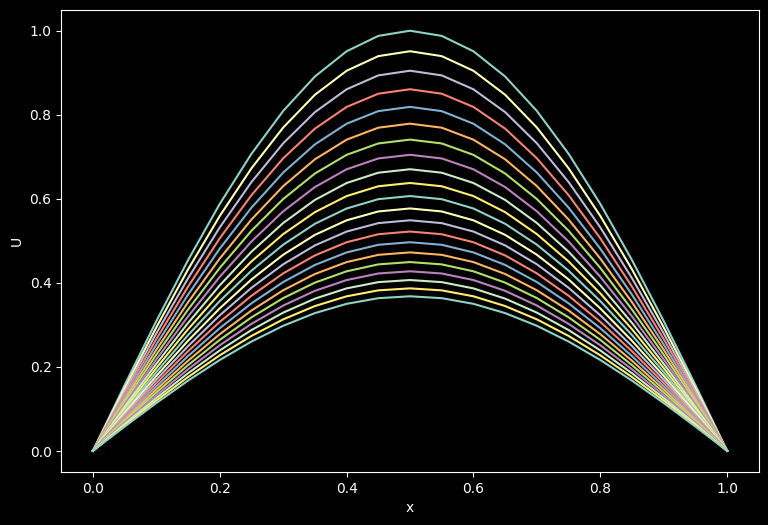

In [6]:
from matplotlib.font_manager import list_fonts
from numpy.core.getlimits import log10
from re import L
dt = 0.005
dx = 0.05
x_max = 1.0
t_max = 1.0
beta = 1.0/np.pi**2

def cond_ini(x):
  return np.sin(np.pi * x)


def solucion_ecu_calor_1D(dt, dx, t_max, x_max, beta, cond_ini):
  r = dt*beta/dx**2
  a = 1 - 2*r
  if a < 0: print('dt debe ser menor que ', str(dx**2/2.0*beta))
  x = np.linspace(0, L, num= 1+int(np.round(x_max/dx)))
  t = np.linspace(0, t_max, num=1+int(np.round(t_max/dt)))
  lx = len(x)
  lt = len(t)
  U = np.zeros((lx, lt))
  U[0, :] = pos_ini(x)
  U[:, 0] = 0
  U[:, -1] = 0
  for n in range(lt-1):
    for i in range(lx-1):
      U[i, n+1] = a*U[i, n] + r(U[i+1, n]+U[i-1, n])
  return x, U




def solucion_ecu_calor_1D(dt, dx, t_max, x_max, beta, cond_ini):
  r = dt*beta/dx**2
  a = 1 - 2*r
  if a < 0: print('dt debe ser menor que ', str(dx**2/2.0*beta))
  x = np.linspace(0, x_max, num=1+int(np.round(x_max/dx)))
  t = np.linspace(0, t_max, num=1+int(np.round(t_max/dt)))
  lx = len(x)
  lt = len(t)
  U = np.zeros([lt, lx])
  U[0, :] = cond_ini(x)
  for n in range(0, lt-1):
    for i in range(1, lx-1):
      U[n+1,i] = a*U[n,i] + r*(U[n,i-1] + U[n,i+1])
  return x, U

x, U = solucion_ecu_calor_1D(dt, dx, t_max, x_max, beta, cond_ini)

print(x.shape, U.shape)

fig = plt.figure(figsize=(9,6))
plt.xlabel('x')
plt.ylabel('U')
for i in np.arange(0,U.shape[0],10):
  plt.plot(x, U[i])
plt.show()

## Ecuación de calor en 2 dimensiones

$$ \frac{\partial u}{\partial t} =
{\beta} \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

Escribiendola en terminos de diferencias finitas queda

$$\frac{u^{n+1}_{i,j}-u^{n}_{i,j}}{\Delta t} = \beta\left(\frac{u^{n}_{i+1,j}-2u^{n}_{i,j}+u^{n}_{i-1,j}}{(\Delta x)^2} + \frac{u^{n}_{i,j+1}-2u^{n}_{i,j}+u^{n}_{i,j-1}}{(\Delta y)^2}\right)  $$

despejando $u^{n+1}_{i,j}$ y factorizando

$$u^{n+1}_{i,j} = au^{n}_{i,j}+r_x(u^{n}_{i-1,j}+u^{n}_{i+1,j}) + r_y(u^{n}_{i,j-1}+u^{n}_{i,j+1})$$

donde $r_x = \Delta t \,\beta/(\Delta x)^2$, $r_y = \Delta t \,\beta/(\Delta y)^2$ y $a =1-2r_x-2r_y$. Para que el método converja de debe escojer $\Delta t$ de forma que $a$ sea positivo, es decir, $\Delta t < \frac{1}{2\beta}\frac{(\Delta x)^2(\Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}$

Se implementa a continuación la solución a la ecuación de calor con $\beta = 1/\pi^2$, $u(0, x, y) = \frac{1}{\sqrt{\sigma}}\exp(-((x-0.5)^2+(y-0.5)^2)/\sigma^2)$, $\sigma=0.6$, $\Delta x =\Delta y= 0.05$, $x \in [0, 1]$, $y \in [0, 1]$ y $t \in [0,0.8]$.

In [7]:
dx = 0.05
dy = 0.05
x_max = 1.0
y_max = 1.0
t_max = 0.4 ## originally 0.8
beta = 1.0/np.pi**2

def cond_ini(x,y):
  sig = 0.6
  return 1/np.sqrt(sig)*np.exp(-((x-0.5)**2 + (y-0.5)**2)/sig**2)

def solucion_ecu_calor_2D(dx, dy, t_max, x_max, y_max, beta, cond_ini):
  dt = (dx**2*dy**2/(dx**2+dy**2))/(4*beta)
  rx = dt*beta/dx**2
  ry = dt*beta/dy**2
  a = 1 - 2*rx - 2*ry
  x = np.linspace(0, x_max, num=1+int(np.round(x_max/dx)))
  y = np.linspace(0, y_max, num=1+int(np.round(y_max/dy)))
  t = np.linspace(0, t_max, num=1+int(np.round(t_max/dt)))
  lx = len(x)
  ly = len(y)
  lt = len(t)
  U = np.zeros([lt, lx, ly])
  X1, Y1 = np.meshgrid(x[1:-1], y[1:-1])
  U[0, 1:-1, 1:-1] = cond_ini(X1, Y1)
  for n in range(0, lt-1):
    for i in range(1, lx-1):
      for j in range(1, ly-1):
        px = rx*(U[n,i-1,j] + U[n,i+1,j])
        py = ry*(U[n,i,j-1] + U[n,i,j+1])
        U[n+1,i,j] = a*U[n,i,j] + px + py
  X, Y = np.meshgrid(x, y)
  return X, Y, U

X, Y, U = solucion_ecu_calor_2D(dx, dy, t_max, x_max, y_max, beta, cond_ini)
print(U.shape)
U = U[::4]
print(U.shape)

(131, 21, 21)
(33, 21, 21)


In [8]:

def update(frame_num, X, Y, U, ax):
  ax.clear()
  ax.set_zlim([np.min(U),np.max(U)])
  ax.plot_surface(X,Y,U[frame_num,:,:],cmap=cm.hot,vmin=0,vmax=np.max(U))

def crear_animacion(X,Y,U):
  N = U.shape[0]
  fig = plt.figure(figsize=(9,6), dpi = 75)
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax = fig.add_subplot(projection='3d')
  ax.xaxis.pane.fill = False
  ax.yaxis.pane.fill = False
  ax.zaxis.pane.fill = False
  ani = animation.FuncAnimation(fig, update, N, fargs=(X, Y, U, ax))
  return ani
  #ani.save('ecuacion_calor_2D.gif',fps=24)
  #plt.close(fig)

crear_animacion(X,Y,U)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# Mostrar video
from IPython.display import HTML
from base64 import b64encode

name = 'ecuacion_calor_2D.mp4'
mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=675 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**References**

**Profesor: Diego Alberto Castro Rodríguez**